In [35]:
import pandas as pd
import glob
import protfasta
import matplotlib.pyplot as plt

### 1. Loading in the variants

In [36]:
variant_fasta_filepaths = glob.glob('../data/experimental_target_variants/*')
variant_fasta_filepaths

['../data/experimental_target_variants/NCOA1_Q15788_AD_840-1011',
 '../data/experimental_target_variants/ERG_P11308_AD_118-261',
 '../data/experimental_target_variants/CAMTA2_O94983_AD_472-581',
 '../data/experimental_target_variants/ERG_P11308_AD_433-479',
 '../data/experimental_target_variants/OTX1_P32242_AD_172-354',
 '../data/experimental_target_variants/NCOA1_Q15788_AD_1241-1385',
 '../data/experimental_target_variants/CAMTA2_O94983_AD_285-468',
 '../data/experimental_target_variants/IKZF1_Q13422_AD_284-365',
 '../data/experimental_target_variants/PAX6_P26367_AD_271-422',
 '../data/experimental_target_variants/NR4A2_P43354_AD_584-598',
 '../data/experimental_target_variants/MEIS2_O14770_AD_340-477',
 '../data/experimental_target_variants/PITX1_P78337_AD_234-283',
 '../data/experimental_target_variants/NR4A2_P43354_AD_1-91',
 '../data/experimental_target_variants/PAX5_Q02548_AD_304-358']

In [37]:
def return_df(filepath):
    fasta = protfasta.read_fasta(filepath)
    return pd.DataFrame({"id" : fasta.keys(), "seq": fasta.values()})

In [38]:
variants_df = []

for filepath in variant_fasta_filepaths:
    AD = filepath.split("/")[-1]
    df = return_df('../soto_analysis/outputs/AD_variant_fasta/' + AD)
    df["AD"] = AD
    variants_df.append(df)
    
variants_df = pd.concat(variants_df)
variants_df

,id,seq,AD
0,g.2.24711069T>A(p.Ser853Thr),VTSVTIKSEILPATLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011
1,g.2.24711081G>A(p.Ala857Thr),VTSVTIKSEILPASLQSTTARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011
2,g.2.24726616T>C(p.Ile876Thr),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEATDNQFGQPGT...,NCOA1_Q15788_AD_840-1011
3,g.2.24726618G>T(p.Asp877Tyr),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIYNQFGQPGT...,NCOA1_Q15788_AD_840-1011
4,g.2.24726628T>C(p.Phe880Ser),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQSGQPGT...,NCOA1_Q15788_AD_840-1011
...,...,...,...
10,g.9.36882076C>T(p.Gly314Arg),GRDLASTTLPRYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358
11,g.9.36882087G>A(p.Thr310Met),GRDLASMTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358
12,g.9.36882088T>C(p.Thr310Ala),GRDLASATLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358
13,g.9.36882093G>A(p.Ala308Val),GRDLVSTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358


In [39]:
# Adding columns for later analysis

variants_df["uniprotID"] = variants_df["AD"].str.split("_").str[1].str.split("_").str[0]
variants_df["#CHROM"] = "chr" + variants_df["id"].str.split(".").str[1]
variants_df["POS"] = variants_df["id"].str.split(".").str[2].str.split(">").str[0].str[:-1].astype(int)
variants_df["REF"] = variants_df["id"].str.split(".").str[2].str.split(">").str[0].str[-1]
variants_df["ALT"] = variants_df["id"].str.split(">").str[1].str[0]
variants_df

,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT
0,g.2.24711069T>A(p.Ser853Thr),VTSVTIKSEILPATLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24711069,T,A
1,g.2.24711081G>A(p.Ala857Thr),VTSVTIKSEILPASLQSTTARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24711081,G,A
2,g.2.24726616T>C(p.Ile876Thr),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEATDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24726616,T,C
3,g.2.24726618G>T(p.Asp877Tyr),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIYNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24726618,G,T
4,g.2.24726628T>C(p.Phe880Ser),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQSGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24726628,T,C
...,...,...,...,...,...,...,...,...
10,g.9.36882076C>T(p.Gly314Arg),GRDLASTTLPRYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882076,C,T
11,g.9.36882087G>A(p.Thr310Met),GRDLASMTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882087,G,A
12,g.9.36882088T>C(p.Thr310Ala),GRDLASATLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882088,T,C
13,g.9.36882093G>A(p.Ala308Val),GRDLVSTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882093,G,A


There are 524 variants total in these ADs.

### How many variants from each AD?

In [40]:
pd.DataFrame(variants_df["AD"].value_counts())

,count
AD,
OTX1_P32242_AD_172-354,67
CAMTA2_O94983_AD_285-468,67
MEIS2_O14770_AD_340-477,67
NCOA1_Q15788_AD_1241-1385,48
NCOA1_Q15788_AD_840-1011,47
PAX6_P26367_AD_271-422,42
CAMTA2_O94983_AD_472-581,41
ERG_P11308_AD_118-261,37
IKZF1_Q13422_AD_284-365,36


### What are the alphamissense pathogenicity scores of the variants from these ADs?

In [41]:
ad_am = pd.read_csv("../output/alphamissense_path_preds_AD_vars.csv", index_col = 0)
ad_am

,#CHROM,1,POS,3,4,5,6,7,8,9,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
0,chr22,42214325,42214326,AD,ENSG00000100207,.,-,ENST00000359486,22,42214325,...,0.000014,H,R,No-Syn,hg38,Q9UGU0,ENST00000359486.7,H327R,0.2956,likely_benign
1,chr22,42214327,42214328,AD,ENSG00000100207,.,-,ENST00000359486,22,42214327,...,0.000014,Q,H,No-Syn,hg38,Q9UGU0,ENST00000359486.7,Q326H,0.2083,likely_benign
2,chr22,42214329,42214330,AD,ENSG00000100207,.,-,ENST00000359486,22,42214329,...,0.000009,Q,E,No-Syn,hg38,Q9UGU0,ENST00000359486.7,Q326E,0.1679,likely_benign
3,chr22,42214335,42214336,AD,ENSG00000100207,.,-,ENST00000359486,22,42214335,...,0.000009,P,S,No-Syn,hg38,Q9UGU0,ENST00000359486.7,P324S,0.0586,likely_benign
4,chr22,42214352,42214353,AD,ENSG00000100207,.,-,ENST00000359486,22,42214352,...,0.000037,P,L,No-Syn,hg38,Q9UGU0,ENST00000359486.7,P318L,0.1107,likely_benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,chr17,40076878,40076879,AD,ENSG00000126351,.,+,ENST00000264637,17,40076878,...,0.000028,S,L,No-Syn,hg38,P10827,ENST00000264637.8,S21L,0.0703,likely_benign
3176,chr17,40076893,40076894,AD,ENSG00000126351,.,+,ENST00000264637,17,40076893,...,0.000019,R,Q,No-Syn,hg38,P10827,ENST00000264637.8,R26Q,0.2129,likely_benign
3177,chr17,40076899,40076900,AD,ENSG00000126351,.,+,ENST00000264637,17,40076899,...,0.000023,R,K,No-Syn,hg38,P10827,ENST00000264637.8,R28K,0.1445,likely_benign
3178,chr17,40076910,40076911,AD,ENSG00000126351,.,+,ENST00000264637,17,40076910,...,0.000014,Q,E,No-Syn,hg38,P10827,ENST00000264637.8,Q32E,0.1266,likely_benign


In [42]:
exp_ads_am = pd.merge(variants_df, ad_am, on = ["#CHROM", "POS", "REF", "ALT"])
exp_ads_am

,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
0,g.2.24711069T>A(p.Ser853Thr),VTSVTIKSEILPATLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24711069,T,A,24711068,AD,...,0.000033,S,T,No-Syn,hg38,Q15788,ENST00000348332.7,S853T,0.0729,likely_benign
1,g.2.24711081G>A(p.Ala857Thr),VTSVTIKSEILPASLQSTTARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24711081,G,A,24711080,AD,...,0.000740,A,T,No-Syn,hg38,Q15788,ENST00000348332.7,A857T,0.0602,likely_benign
2,g.2.24726616T>C(p.Ile876Thr),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEATDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24726616,T,C,24726615,AD,...,0.000056,I,T,No-Syn,hg38,Q15788,ENST00000348332.7,I876T,0.0600,likely_benign
3,g.2.24726618G>T(p.Asp877Tyr),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIYNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24726618,G,T,24726617,AD,...,0.000005,D,Y,No-Syn,hg38,Q15788,ENST00000348332.7,D877Y,0.2939,likely_benign
4,g.2.24726628T>C(p.Phe880Ser),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQSGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24726628,T,C,24726627,AD,...,0.000019,F,S,No-Syn,hg38,Q15788,ENST00000348332.7,F880S,0.1388,likely_benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,g.9.36882076C>T(p.Gly314Arg),GRDLASTTLPRYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882076,C,T,36882075,AD,...,0.000005,G,R,No-Syn,hg38,Q02548,ENST00000358127.9,G314R,0.9880,likely_pathogenic
515,g.9.36882087G>A(p.Thr310Met),GRDLASMTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882087,G,A,36882086,AD,...,0.000009,T,M,No-Syn,hg38,Q02548,ENST00000358127.9,T310M,0.3615,ambiguous
516,g.9.36882088T>C(p.Thr310Ala),GRDLASATLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882088,T,C,36882087,AD,...,0.000009,T,A,No-Syn,hg38,Q02548,ENST00000358127.9,T310A,0.1492,likely_benign
517,g.9.36882093G>A(p.Ala308Val),GRDLVSTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882093,G,A,36882092,AD,...,0.000843,A,V,No-Syn,hg38,Q02548,ENST00000358127.9,A308V,0.1399,likely_benign


#### What are the 5 highest for each AD?

In [43]:
# top_5.columns

In [44]:
top_5 = []

for AD in set(exp_ads_am["AD"]):
    subframe = exp_ads_am[exp_ads_am["AD"] == AD].sort_values(by = "am_pathogenicity", ascending = False)[:5]
    display(subframe)
    top_5.append(subframe)

top_5 = pd.concat(top_5)
top_5[["AD", "id", "seq", "am_pathogenicity"]].to_csv("../output/caitlin_experiment/alpha_missense_top5.csv")

,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
333,g.7.50400020C>T(p.Ala318Val),GDKGLSDTPYDSSASYEKENEMMKSHVMDQAINNVINYLGAESLRP...,IKZF1_Q13422_AD_284-365,Q13422,chr7,50400020,C,T,50400019,AD,...,0.000009,A,V,No-Syn,hg38,Q13422,ENST00000331340.8,A318V,0.7742,likely_pathogenic
334,g.7.50400053C>A(p.Pro329Gln),GDKGLSDTPYDSSASYEKENEMMKSHVMDQAINNAINYLGAESLRQ...,IKZF1_Q13422_AD_284-365,Q13422,chr7,50400053,C,A,50400052,AD,...,0.000014,P,Q,No-Syn,hg38,Q13422,ENST00000331340.8,P329Q,0.6355,likely_pathogenic
346,g.7.50400110A>G(p.Tyr348Cys),GDKGLSDTPYDSSASYEKENEMMKSHVMDQAINNAINYLGAESLRP...,IKZF1_Q13422_AD_284-365,Q13422,chr7,50400110,A,G,50400109,AD,...,0.000019,Y,C,No-Syn,hg38,Q13422,ENST00000331340.8,Y348C,0.5093,ambiguous
328,g.7.50399953A>C(p.Ser296Arg),GDKGLSDTPYDSRASYEKENEMMKSHVMDQAINNAINYLGAESLRP...,IKZF1_Q13422_AD_284-365,Q13422,chr7,50399953,A,C,50399952,AD,...,0.000005,S,R,No-Syn,hg38,Q13422,ENST00000331340.8,S296R,0.4706,ambiguous
340,g.7.50400092C>G(p.Pro342Arg),GDKGLSDTPYDSSASYEKENEMMKSHVMDQAINNAINYLGAESLRP...,IKZF1_Q13422_AD_284-365,Q13422,chr7,50400092,C,G,50400091,AD,...,0.000014,P,R,No-Syn,hg38,Q13422,ENST00000331340.8,P342R,0.4315,ambiguous


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
399,g.2.156325775T>C(p.Asp589Gly),PPAIIGKLFLDTLPF,NR4A2_P43354_AD_584-598,P43354,chr2,156325775,T,C,156325774,AD,...,0.000005,D,G,No-Syn,hg38,P43354,ENST00000409572.5,D589G,0.9624,likely_pathogenic
400,g.2.156325781A>T(p.Ile587Lys),PPAKIDKLFLDTLPF,NR4A2_P43354_AD_584-598,P43354,chr2,156325781,A,T,156325780,AD,...,0.000009,I,K,No-Syn,hg38,P43354,ENST00000409572.5,I587K,0.8756,likely_pathogenic
398,g.2.156325772T>C(p.Lys590Arg),PPAIIDRLFLDTLPF,NR4A2_P43354_AD_584-598,P43354,chr2,156325772,T,C,156325771,AD,...,0.000005,K,R,No-Syn,hg38,P43354,ENST00000409572.5,K590R,0.1224,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
468,g.5.135028885G>C(p.Ser280Trp),VPGMPNSGLNNINNLTGSSLNSAMSPGACPYGTPASPYSVYRDTCN...,PITX1_P78337_AD_234-283,P78337,chr5,135028885,G,C,135028884,AD,...,0.000009,S,W,No-Syn,hg38,P78337,ENST00000506438.5,S280W,0.9669,likely_pathogenic
469,g.5.135028887G>C(p.Asn279Lys),VPGMPNSGLNNINNLTGSSLNSAMSPGACPYGTPASPYSVYRDTCK...,PITX1_P78337_AD_234-283,P78337,chr5,135028887,G,C,135028886,AD,...,0.000009,N,K,No-Syn,hg38,P78337,ENST00000506438.5,N279K,0.9528,likely_pathogenic
470,g.5.135028901G>A(p.Arg275Trp),VPGMPNSGLNNINNLTGSSLNSAMSPGACPYGTPASPYSVYWDTCN...,PITX1_P78337_AD_234-283,P78337,chr5,135028901,G,A,135028900,AD,...,0.000005,R,W,No-Syn,hg38,P78337,ENST00000506438.5,R275W,0.9189,likely_pathogenic
475,g.5.135028931C>G(p.Gly265Arg),VPGMPNSGLNNINNLTGSSLNSAMSPGACPYRTPASPYSVYRDTCN...,PITX1_P78337_AD_234-283,P78337,chr5,135028931,C,G,135028930,AD,...,0.000019,G,R,No-Syn,hg38,P78337,ENST00000506438.5,G265R,0.8988,likely_pathogenic
484,g.5.135028990A>T(p.Ile245Asn),VPGMPNSGLNNNNNLTGSSLNSAMSPGACPYGTPASPYSVYRDTCN...,PITX1_P78337_AD_234-283,P78337,chr5,135028990,A,T,135028989,AD,...,0.000005,I,N,No-Syn,hg38,P78337,ENST00000506438.5,I245N,0.8013,likely_pathogenic


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
95,g.17.4978600A>G(p.Trp557Arg),SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,CAMTA2_O94983_AD_472-581,O94983,chr17,4978600,A,G,4978599,AD,...,0.000005,W,R,No-Syn,hg38,O94983,ENST00000348066.8,W557R,0.9999,likely_pathogenic
84,g.17.4978536A>T(p.Val578Asp),SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,CAMTA2_O94983_AD_472-581,O94983,chr17,4978536,A,T,4978535,AD,...,0.000005,V,D,No-Syn,hg38,O94983,ENST00000348066.8,V578D,0.9994,likely_pathogenic
96,g.17.4979698A>C(p.Trp542Gly),SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,CAMTA2_O94983_AD_472-581,O94983,chr17,4979698,A,C,4979697,AD,...,0.000005,W,G,No-Syn,hg38,O94983,ENST00000348066.8,W542G,0.9916,likely_pathogenic
90,g.17.4978573A>T(p.Cys566Ser),SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,CAMTA2_O94983_AD_472-581,O94983,chr17,4978573,A,T,4978572,AD,...,0.000005,C,S,No-Syn,hg38,O94983,ENST00000348066.8,C566S,0.9765,likely_pathogenic
105,g.17.4979777A>T(p.Ser515Arg),SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELIRDE...,CAMTA2_O94983_AD_472-581,O94983,chr17,4979777,A,T,4979776,AD,...,0.000009,S,R,No-Syn,hg38,O94983,ENST00000348066.8,S515R,0.5737,likely_pathogenic


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
22,g.2.24728363G>A(p.Gly925Arg),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24728363,G,A,24728362,AD,...,0.000009,G,R,No-Syn,hg38,Q15788,ENST00000348332.7,G925R,0.9773,likely_pathogenic
20,g.2.24728343G>A(p.Cys918Tyr),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24728343,G,A,24728342,AD,...,0.000014,C,Y,No-Syn,hg38,Q15788,ENST00000348332.7,C918Y,0.8895,likely_pathogenic
27,g.2.24729501G>T(p.Gly963Trp),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24729501,G,T,24729500,AD,...,0.000005,G,W,No-Syn,hg38,Q15788,ENST00000348332.7,G963W,0.8679,likely_pathogenic
23,g.2.24728432C>G(p.Leu948Val),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24728432,C,G,24728431,AD,...,0.000005,L,V,No-Syn,hg38,Q15788,ENST00000348332.7,L948V,0.7575,likely_pathogenic
19,g.2.24728334A>T(p.Glu915Val),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24728334,A,T,24728333,AD,...,0.000005,E,V,No-Syn,hg38,Q15788,ENST00000348332.7,E915V,0.7495,likely_pathogenic


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
136,g.21.38383508A>C(p.Phe452Leu),QKMNFVAPHPPALPVTSSSLFAAPNPYWNSPTGGIYPNTRLPTSHMP,ERG_P11308_AD_433-479,P11308,chr21,38383508,A,C,38383507,AD,...,0.000005,F,L,No-Syn,hg38,P11308,ENST00000288319.12,F445L,0.8263,likely_pathogenic
130,g.21.38383470C>T(p.Gly465Glu),QKMNFVAPHPPALPVTSSSFFAAPNPYWNSPTEGIYPNTRLPTSHMP,ERG_P11308_AD_433-479,P11308,chr21,38383470,C,T,38383469,AD,...,0.000014,G,E,No-Syn,hg38,P11308,ENST00000288319.12,G458E,0.5703,likely_pathogenic
132,g.21.38383489A>T(p.Tyr459Asn),QKMNFVAPHPPALPVTSSSFFAAPNPNWNSPTGGIYPNTRLPTSHMP,ERG_P11308_AD_433-479,P11308,chr21,38383489,A,T,38383488,AD,...,0.000005,Y,N,No-Syn,hg38,P11308,ENST00000288319.12,Y452N,0.5590,ambiguous
133,g.21.38383493G>T(p.Asn457Lys),QKMNFVAPHPPALPVTSSSFFAAPKPYWNSPTGGIYPNTRLPTSHMP,ERG_P11308_AD_433-479,P11308,chr21,38383493,G,T,38383492,AD,...,0.000005,N,K,No-Syn,hg38,P11308,ENST00000288319.12,N450K,0.4979,ambiguous
137,g.21.38383510A>T(p.Phe452Ile),QKMNFVAPHPPALPVTSSSIFAAPNPYWNSPTGGIYPNTRLPTSHMP,ERG_P11308_AD_433-479,P11308,chr21,38383510,A,T,38383509,AD,...,0.000005,F,I,No-Syn,hg38,P11308,ENST00000288319.12,F445I,0.3272,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
362,g.11.31789944C>A(p.Arg420Ile),LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLG...,PAX6_P26367_AD_271-422,P26367,chr11,31789944,C,A,31789943,AD,...,0.000853,R,I,No-Syn,hg38,P26367,ENST00000640287.1,R420I,0.9358,likely_pathogenic
361,g.11.31789943T>A(p.Arg420Ser),LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLG...,PAX6_P26367_AD_271-422,P26367,chr11,31789943,T,A,31789942,AD,...,0.000047,R,S,No-Syn,hg38,P26367,ENST00000640287.1,R420S,0.9071,likely_pathogenic
363,g.11.31789944C>G(p.Arg420Thr),LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLG...,PAX6_P26367_AD_271-422,P26367,chr11,31789944,C,G,31789943,AD,...,0.000052,R,T,No-Syn,hg38,P26367,ENST00000640287.1,R420T,0.9042,likely_pathogenic
372,g.11.31790746T>G(p.Ser383Arg),LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLG...,PAX6_P26367_AD_271-422,P26367,chr11,31790746,T,G,31790745,AD,...,0.000014,S,R,No-Syn,hg38,P26367,ENST00000640287.1,S383R,0.8297,likely_pathogenic
367,g.11.31789966C>G(p.Asp413His),LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLG...,PAX6_P26367_AD_271-422,P26367,chr11,31789966,C,G,31789965,AD,...,0.000019,D,H,No-Syn,hg38,P26367,ENST00000640287.1,D413H,0.7750,likely_pathogenic


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
67,g.21.38403643A>G(p.Leu159Pro),KHMPPPNMTTNERRVIVPADPTLWSTDHVRQWLEWAVKEYGPPDVN...,ERG_P11308_AD_118-261,P11308,chr21,38403643,A,G,38403642,AD,...,0.000009,L,P,No-Syn,hg38,P11308,ENST00000288319.12,L152P,0.9986,likely_pathogenic
78,g.21.38423419C>T(p.Val134Met),KHMPPPNMTTNERRVIMPADPTLWSTDHVRQWLEWAVKEYGLPDVN...,ERG_P11308_AD_118-261,P11308,chr21,38423419,C,T,38423418,AD,...,0.000005,V,M,No-Syn,hg38,P11308,ENST00000288319.12,V127M,0.9952,likely_pathogenic
68,g.21.38403650A>G(p.Tyr157His),KHMPPPNMTTNERRVIVPADPTLWSTDHVRQWLEWAVKEHGLPDVN...,ERG_P11308_AD_118-261,P11308,chr21,38403650,A,G,38403649,AD,...,0.000005,Y,H,No-Syn,hg38,P11308,ENST00000288319.12,Y150H,0.9931,likely_pathogenic
53,g.21.38402573C>T(p.Met226Ile),KHMPPPNMTTNERRVIVPADPTLWSTDHVRQWLEWAVKEYGLPDVN...,ERG_P11308_AD_118-261,P11308,chr21,38402573,C,T,38402572,AD,...,0.000426,M,I,No-Syn,hg38,P11308,ENST00000288319.12,M219I,0.8340,likely_pathogenic
71,g.21.38403661G>A(p.Ala153Val),KHMPPPNMTTNERRVIVPADPTLWSTDHVRQWLEWVVKEYGLPDVN...,ERG_P11308_AD_118-261,P11308,chr21,38403661,G,A,38403660,AD,...,0.000009,A,V,No-Syn,hg38,P11308,ENST00000288319.12,A146V,0.7841,likely_pathogenic


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
291,g.17.4980182A>T(p.Phe380Leu),KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,CAMTA2_O94983_AD_285-468,O94983,chr17,4980182,A,T,4980181,AD,...,0.000009,F,L,No-Syn,hg38,O94983,ENST00000348066.8,F380L,0.9959,likely_pathogenic
292,g.17.4980184A>G(p.Phe380Leu),KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,CAMTA2_O94983_AD_285-468,O94983,chr17,4980184,A,G,4980183,AD,...,0.000005,F,L,No-Syn,hg38,O94983,ENST00000348066.8,F380L,0.9959,likely_pathogenic
288,g.17.4980156G>T(p.Thr389Lys),KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,CAMTA2_O94983_AD_285-468,O94983,chr17,4980156,G,T,4980155,AD,...,0.000009,T,K,No-Syn,hg38,O94983,ENST00000348066.8,T389K,0.7793,likely_pathogenic
290,g.17.4980178T>G(p.Asn382His),KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,CAMTA2_O94983_AD_285-468,O94983,chr17,4980178,T,G,4980177,AD,...,0.000005,N,H,No-Syn,hg38,O94983,ENST00000348066.8,N382H,0.5467,ambiguous
287,g.17.4980148C>T(p.Gly392Arg),KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,CAMTA2_O94983_AD_285-468,O94983,chr17,4980148,C,T,4980147,AD,...,0.000005,G,R,No-Syn,hg38,O94983,ENST00000348066.8,G392R,0.3957,ambiguous


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
503,g.2.156330170G>T(p.Ala6Glu),MPCVQEQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,NR4A2_P43354_AD_1-91,P43354,chr2,156330170,G,T,156330169,AD,...,0.000009,A,E,No-Syn,hg38,P43354,ENST00000409572.5,A6E,0.9396,likely_pathogenic
496,g.2.156329999A>C(p.Phe63Cys),MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,NR4A2_P43354_AD_1-91,P43354,chr2,156329999,A,C,156329998,AD,...,0.000033,F,C,No-Syn,hg38,P43354,ENST00000409572.5,F63C,0.8556,likely_pathogenic
498,g.2.156330090C>T(p.Asp33Asn),MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSNFLTPEFVKFSMDL...,NR4A2_P43354_AD_1-91,P43354,chr2,156330090,C,T,156330089,AD,...,0.000019,D,N,No-Syn,hg38,P43354,ENST00000409572.5,D33N,0.5625,ambiguous
492,g.2.156329942G>C(p.Pro82Arg),MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,NR4A2_P43354_AD_1-91,P43354,chr2,156329942,G,C,156329941,AD,...,0.000009,P,R,No-Syn,hg38,P43354,ENST00000409572.5,P82R,0.3257,likely_benign
497,g.2.156330024T>C(p.Thr55Ala),MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,NR4A2_P43354_AD_1-91,P43354,chr2,156330024,T,C,156330023,AD,...,0.000014,T,A,No-Syn,hg38,P43354,ENST00000409572.5,T55A,0.2204,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
514,g.9.36882076C>T(p.Gly314Arg),GRDLASTTLPRYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882076,C,T,36882075,AD,...,0.000005,G,R,No-Syn,hg38,Q02548,ENST00000358127.9,G314R,0.9880,likely_pathogenic
505,g.9.36846915C>T(p.Gly343Arg),GRDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSRSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36846915,C,T,36846914,AD,...,0.000037,G,R,No-Syn,hg38,Q02548,ENST00000358127.9,G343R,0.8343,likely_pathogenic
510,g.9.36882054G>C(p.Pro321Arg),GRDLASTTLPGYPPHVPRAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882054,G,C,36882053,AD,...,0.000014,P,R,No-Syn,hg38,Q02548,ENST00000358127.9,P321R,0.6546,likely_pathogenic
511,g.9.36882054G>T(p.Pro321His),GRDLASTTLPGYPPHVPHAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882054,G,T,36882053,AD,...,0.000023,P,H,No-Syn,hg38,Q02548,ENST00000358127.9,P321H,0.4217,ambiguous
506,g.9.36846921A>T(p.Phe341Ile),GRDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEISGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36846921,A,T,36846920,AD,...,0.000009,F,I,No-Syn,hg38,Q02548,ENST00000358127.9,F341I,0.4204,ambiguous


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
467,g.15.36896640A>T(p.Ser342Thr),DQTNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...,MEIS2_O14770_AD_340-477,O14770,chr15,36896640,A,T,36896639,AD,...,0.000005,S,T,No-Syn,hg38,O14770,ENST00000561208.6,S342T,0.7723,likely_pathogenic
462,g.15.36895159C>G(p.Arg380Pro),DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIPPAGLQ...,MEIS2_O14770_AD_340-477,O14770,chr15,36895159,C,G,36895158,AD,...,0.000014,R,P,No-Syn,hg38,O14770,ENST00000561208.6,R380P,0.7388,likely_pathogenic
402,g.15.36892183T>C(p.His475Arg),DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...,MEIS2_O14770_AD_340-477,O14770,chr15,36892183,T,C,36892182,AD,...,0.000052,H,R,No-Syn,hg38,O14770,ENST00000561208.6,H475R,0.6970,likely_pathogenic
408,g.15.36892202C>T(p.Gly469Arg),DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...,MEIS2_O14770_AD_340-477,O14770,chr15,36892202,C,T,36892201,AD,...,0.000019,G,R,No-Syn,hg38,O14770,ENST00000561208.6,G469R,0.5636,ambiguous
422,g.15.36892283C>T(p.Gly442Arg),DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...,MEIS2_O14770_AD_340-477,O14770,chr15,36892283,C,T,36892282,AD,...,0.000009,G,R,No-Syn,hg38,O14770,ENST00000561208.6,G442R,0.5501,ambiguous


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
236,g.2.24758033C>A(p.Asn1314Lys),GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASGYQSPDMKAWQ...,NCOA1_Q15788_AD_1241-1385,Q15788,chr2,24758033,C,A,24758032,AD,...,0.000014,N,K,No-Syn,hg38,Q15788,ENST00000348332.7,N1314K,0.9657,likely_pathogenic
226,g.2.24752122A>G(p.Lys1283Glu),GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASGYQSPDMEAWQ...,NCOA1_Q15788_AD_1241-1385,Q15788,chr2,24752122,A,G,24752121,AD,...,0.000009,K,E,No-Syn,hg38,Q15788,ENST00000348332.7,K1283E,0.6806,likely_pathogenic
223,g.2.24752101G>A(p.Gly1276Arg),GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASRYQSPDMKAWQ...,NCOA1_Q15788_AD_1241-1385,Q15788,chr2,24752101,G,A,24752100,AD,...,0.000023,G,R,No-Syn,hg38,Q15788,ENST00000348332.7,G1276R,0.6389,likely_pathogenic
237,g.2.24758038G>A(p.Ser1316Asn),GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASGYQSPDMKAWQ...,NCOA1_Q15788_AD_1241-1385,Q15788,chr2,24758038,G,A,24758037,AD,...,0.000005,S,N,No-Syn,hg38,Q15788,ENST00000348332.7,S1316N,0.6389,likely_pathogenic
247,g.2.24758116C>T(p.Ser1342Phe),GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASGYQSPDMKAWQ...,NCOA1_Q15788_AD_1241-1385,Q15788,chr2,24758116,C,T,24758115,AD,...,0.000014,S,F,No-Syn,hg38,Q15788,ENST00000348332.7,S1342F,0.5934,likely_pathogenic


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
207,g.2.63056283G>T(p.Lys344Asn),AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,OTX1_P32242_AD_172-354,P32242,chr2,63056283,G,T,63056282,AD,...,0.000005,K,N,No-Syn,hg38,P32242,ENST00000282549.7,K344N,0.9793,likely_pathogenic
143,g.2.63055787C>T(p.Pro179Leu),AASSIWSLASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,OTX1_P32242_AD_172-354,P32242,chr2,63055787,C,T,63055786,AD,...,0.000005,P,L,No-Syn,hg38,P32242,ENST00000282549.7,P179L,0.9668,likely_pathogenic
179,g.2.63055990G>C(p.Asp247His),AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,OTX1_P32242_AD_172-354,P32242,chr2,63055990,G,C,63055989,AD,...,0.000005,D,H,No-Syn,hg38,P32242,ENST00000282549.7,D247H,0.8956,likely_pathogenic
206,g.2.63056270G>C(p.Cys340Ser),AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,OTX1_P32242_AD_172-354,P32242,chr2,63056270,G,C,63056269,AD,...,0.000023,C,S,No-Syn,hg38,P32242,ENST00000282549.7,C340S,0.7446,likely_pathogenic
199,g.2.63056203G>A(p.Asp318Asn),AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,OTX1_P32242_AD_172-354,P32242,chr2,63056203,G,A,63056202,AD,...,0.000005,D,N,No-Syn,hg38,P32242,ENST00000282549.7,D318N,0.7354,likely_pathogenic


#### What are the 5 lowest for each AD?

In [45]:
bottom_5 = []

for AD in set(exp_ads_am["AD"]):
    subframe = exp_ads_am[exp_ads_am["AD"] == AD].sort_values(by = "am_pathogenicity", ascending = True)[:5]
    display(subframe)
    bottom_5.append(subframe)

bottom_5 = pd.concat(bottom_5)
bottom_5[["AD", "id", "seq", "am_pathogenicity"]].to_csv("../output/caitlin_experiment/alpha_missense_bottom5.csv")

,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
353,g.7.50400142C>G(p.Pro359Ala),GDKGLSDTPYDSSASYEKENEMMKSHVMDQAINNAINYLGAESLRP...,IKZF1_Q13422_AD_284-365,Q13422,chr7,50400142,C,G,50400141,AD,...,0.000023,P,A,No-Syn,hg38,Q13422,ENST00000331340.8,P359A,0.0635,likely_benign
352,g.7.50400139A>C(p.Thr358Pro),GDKGLSDTPYDSSASYEKENEMMKSHVMDQAINNAINYLGAESLRP...,IKZF1_Q13422_AD_284-365,Q13422,chr7,50400139,A,C,50400138,AD,...,0.000014,T,P,No-Syn,hg38,Q13422,ENST00000331340.8,T358P,0.0719,likely_benign
338,g.7.50400076G>A(p.Gly337Ser),GDKGLSDTPYDSSASYEKENEMMKSHVMDQAINNAINYLGAESLRP...,IKZF1_Q13422_AD_284-365,Q13422,chr7,50400076,G,A,50400075,AD,...,0.000749,G,S,No-Syn,hg38,Q13422,ENST00000331340.8,G337S,0.0768,likely_benign
350,g.7.50400130G>T(p.Ala355Ser),GDKGLSDTPYDSSASYEKENEMMKSHVMDQAINNAINYLGAESLRP...,IKZF1_Q13422_AD_284-365,Q13422,chr7,50400130,G,T,50400129,AD,...,0.000005,A,S,No-Syn,hg38,Q13422,ENST00000331340.8,A355S,0.0839,likely_benign
330,g.7.50399956G>A(p.Ala297Thr),GDKGLSDTPYDSSTSYEKENEMMKSHVMDQAINNAINYLGAESLRP...,IKZF1_Q13422_AD_284-365,Q13422,chr7,50399956,G,A,50399955,AD,...,0.000009,A,T,No-Syn,hg38,Q13422,ENST00000331340.8,A297T,0.0876,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
398,g.2.156325772T>C(p.Lys590Arg),PPAIIDRLFLDTLPF,NR4A2_P43354_AD_584-598,P43354,chr2,156325772,T,C,156325771,AD,...,0.000005,K,R,No-Syn,hg38,P43354,ENST00000409572.5,K590R,0.1224,likely_benign
400,g.2.156325781A>T(p.Ile587Lys),PPAKIDKLFLDTLPF,NR4A2_P43354_AD_584-598,P43354,chr2,156325781,A,T,156325780,AD,...,0.000009,I,K,No-Syn,hg38,P43354,ENST00000409572.5,I587K,0.8756,likely_pathogenic
399,g.2.156325775T>C(p.Asp589Gly),PPAIIGKLFLDTLPF,NR4A2_P43354_AD_584-598,P43354,chr2,156325775,T,C,156325774,AD,...,0.000005,D,G,No-Syn,hg38,P43354,ENST00000409572.5,D589G,0.9624,likely_pathogenic


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
485,g.5.135029008T>C(p.Asn239Ser),VPGMPSSGLNNINNLTGSSLNSAMSPGACPYGTPASPYSVYRDTCN...,PITX1_P78337_AD_234-283,P78337,chr5,135029008,T,C,135029007,AD,...,0.000005,N,S,No-Syn,hg38,P78337,ENST00000506438.5,N239S,0.0480,likely_benign
481,g.5.135028978G>C(p.Thr249Ser),VPGMPNSGLNNINNLSGSSLNSAMSPGACPYGTPASPYSVYRDTCN...,PITX1_P78337_AD_234-283,P78337,chr5,135028978,G,C,135028977,AD,...,0.000009,T,S,No-Syn,hg38,P78337,ENST00000506438.5,T249S,0.0586,likely_benign
486,g.5.135029012G>C(p.Pro238Ala),VPGMANSGLNNINNLTGSSLNSAMSPGACPYGTPASPYSVYRDTCN...,PITX1_P78337_AD_234-283,P78337,chr5,135029012,G,C,135029011,AD,...,0.000009,P,A,No-Syn,hg38,P78337,ENST00000506438.5,P238A,0.0600,likely_benign
478,g.5.135028946C>T(p.Gly260Ser),VPGMPNSGLNNINNLTGSSLNSAMSPSACPYGTPASPYSVYRDTCN...,PITX1_P78337_AD_234-283,P78337,chr5,135028946,C,T,135028945,AD,...,0.000019,G,S,No-Syn,hg38,P78337,ENST00000506438.5,G260S,0.0625,likely_benign
474,g.5.135028928T>C(p.Thr266Ala),VPGMPNSGLNNINNLTGSSLNSAMSPGACPYGAPASPYSVYRDTCN...,PITX1_P78337_AD_234-283,P78337,chr5,135028928,T,C,135028927,AD,...,0.000033,T,A,No-Syn,hg38,P78337,ENST00000506438.5,T266A,0.0686,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
115,g.17.4979884T>C(p.Ser480Gly),SPAPLEPSGRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,CAMTA2_O94983_AD_472-581,O94983,chr17,4979884,T,C,4979883,AD,...,0.000005,S,G,No-Syn,hg38,O94983,ENST00000348066.8,S480G,0.0479,likely_benign
110,g.17.4979844A>G(p.Val493Ala),SPAPLEPSSRVGRGEALFGGPAGASELEPFSLSSFPDLMGELISDE...,CAMTA2_O94983_AD_472-581,O94983,chr17,4979844,A,G,4979843,AD,...,0.000005,V,A,No-Syn,hg38,O94983,ENST00000348066.8,V493A,0.0527,likely_benign
120,g.17.4979899G>C(p.Pro475Ala),SPAALEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,CAMTA2_O94983_AD_472-581,O94983,chr17,4979899,G,C,4979898,AD,...,0.000005,P,A,No-Syn,hg38,O94983,ENST00000348066.8,P475A,0.0545,likely_benign
100,g.17.4979746G>A(p.Pro526Ser),SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,CAMTA2_O94983_AD_472-581,O94983,chr17,4979746,G,A,4979745,AD,...,0.000005,P,S,No-Syn,hg38,O94983,ENST00000348066.8,P526S,0.0612,likely_benign
103,g.17.4979758G>A(p.Pro522Ser),SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,CAMTA2_O94983_AD_472-581,O94983,chr17,4979758,G,A,4979757,AD,...,0.000028,P,S,No-Syn,hg38,O94983,ENST00000348066.8,P522S,0.0694,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
36,g.2.24729563C>G(p.Ile983Met),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24729563,C,G,24729562,AD,...,0.000009,I,M,No-Syn,hg38,Q15788,ENST00000348332.7,I983M,0.0423,likely_benign
44,g.2.24729630A>G(p.Ser1006Gly),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24729630,A,G,24729629,AD,...,0.000014,S,G,No-Syn,hg38,Q15788,ENST00000348332.7,S1006G,0.0554,likely_benign
2,g.2.24726616T>C(p.Ile876Thr),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEATDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24726616,T,C,24726615,AD,...,0.000056,I,T,No-Syn,hg38,Q15788,ENST00000348332.7,I876T,0.0600,likely_benign
1,g.2.24711081G>A(p.Ala857Thr),VTSVTIKSEILPASLQSTTARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24711081,G,A,24711080,AD,...,0.000740,A,T,No-Syn,hg38,Q15788,ENST00000348332.7,A857T,0.0602,likely_benign
42,g.2.24729622A>G(p.Asn1003Ser),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,NCOA1_Q15788_AD_840-1011,Q15788,chr2,24729622,A,G,24729621,AD,...,0.000009,N,S,No-Syn,hg38,Q15788,ENST00000348332.7,N1003S,0.0603,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
139,g.21.38383546G>A(p.Pro440Ser),QKMNFVASHPPALPVTSSSFFAAPNPYWNSPTGGIYPNTRLPTSHMP,ERG_P11308_AD_433-479,P11308,chr21,38383546,G,A,38383545,AD,...,0.000112,P,S,No-Syn,hg38,P11308,ENST00000288319.12,P433S,0.0606,likely_benign
131,g.21.38383477G>C(p.Pro463Ala),QKMNFVAPHPPALPVTSSSFFAAPNPYWNSATGGIYPNTRLPTSHMP,ERG_P11308_AD_433-479,P11308,chr21,38383477,G,C,38383476,AD,...,0.000005,P,A,No-Syn,hg38,P11308,ENST00000288319.12,P456A,0.0626,likely_benign
135,g.21.38383503G>C(p.Ala454Gly),QKMNFVAPHPPALPVTSSSFFGAPNPYWNSPTGGIYPNTRLPTSHMP,ERG_P11308_AD_433-479,P11308,chr21,38383503,G,C,38383502,AD,...,0.000005,A,G,No-Syn,hg38,P11308,ENST00000288319.12,A447G,0.0644,likely_benign
127,g.21.38383437C>G(p.Ser476Thr),QKMNFVAPHPPALPVTSSSFFAAPNPYWNSPTGGIYPNTRLPTTHMP,ERG_P11308_AD_433-479,P11308,chr21,38383437,C,G,38383436,AD,...,0.000005,S,T,No-Syn,hg38,P11308,ENST00000288319.12,S469T,0.0655,likely_benign
128,g.21.38383438T>C(p.Ser476Gly),QKMNFVAPHPPALPVTSSSFFAAPNPYWNSPTGGIYPNTRLPTGHMP,ERG_P11308_AD_433-479,P11308,chr21,38383438,T,C,38383437,AD,...,0.000009,S,G,No-Syn,hg38,P11308,ENST00000288319.12,S469G,0.0669,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
384,g.11.31790857G>C(p.Pro346Ala),LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLG...,PAX6_P26367_AD_271-422,P26367,chr11,31790857,G,C,31790856,AD,...,0.000019,P,A,No-Syn,hg38,P26367,ENST00000640287.1,P346A,0.0455,likely_benign
388,g.11.31793491T>C(p.Ser327Gly),LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLG...,PAX6_P26367_AD_271-422,P26367,chr11,31793491,T,C,31793490,AD,...,0.000014,S,G,No-Syn,hg38,P26367,ENST00000640287.1,S327G,0.0603,likely_benign
371,g.11.31790746T>C(p.Ser383Gly),LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLG...,PAX6_P26367_AD_271-422,P26367,chr11,31790746,T,C,31790745,AD,...,0.000009,S,G,No-Syn,hg38,P26367,ENST00000640287.1,S383G,0.0650,likely_benign
366,g.11.31789963T>C(p.Met414Val),LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLG...,PAX6_P26367_AD_271-422,P26367,chr11,31789963,T,C,31789962,AD,...,0.000009,M,V,No-Syn,hg38,P26367,ENST00000640287.1,M414V,0.0699,likely_benign
392,g.11.31793509C>T(p.Ala321Thr),LRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLG...,PAX6_P26367_AD_271-422,P26367,chr11,31793509,C,T,31793508,AD,...,0.000014,A,T,No-Syn,hg38,P26367,ENST00000640287.1,A321T,0.0715,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
61,g.21.38403584T>A(p.Thr179Ser),KHMPPPNMTTNERRVIVPADPTLWSTDHVRQWLEWAVKEYGLPDVN...,ERG_P11308_AD_118-261,P11308,chr21,38403584,T,A,38403583,AD,...,0.000005,T,S,No-Syn,hg38,P11308,ENST00000288319.12,T172S,0.0663,likely_benign
58,g.21.38403547T>C(p.Asn191Ser),KHMPPPNMTTNERRVIVPADPTLWSTDHVRQWLEWAVKEYGLPDVN...,ERG_P11308_AD_118-261,P11308,chr21,38403547,T,C,38403546,AD,...,0.000014,N,S,No-Syn,hg38,P11308,ENST00000288319.12,N184S,0.0719,likely_benign
66,g.21.38403635C>T(p.Val162Ile),KHMPPPNMTTNERRVIVPADPTLWSTDHVRQWLEWAVKEYGLPDIN...,ERG_P11308_AD_118-261,P11308,chr21,38403635,C,T,38403634,AD,...,0.000037,V,I,No-Syn,hg38,P11308,ENST00000288319.12,V155I,0.0774,likely_benign
73,g.21.38403679C>T(p.Arg147Gln),KHMPPPNMTTNERRVIVPADPTLWSTDHVQQWLEWAVKEYGLPDVN...,ERG_P11308_AD_118-261,P11308,chr21,38403679,C,T,38403678,AD,...,0.000014,R,Q,No-Syn,hg38,P11308,ENST00000288319.12,R140Q,0.0788,likely_benign
65,g.21.38403617G>C(p.Gln168Glu),KHMPPPNMTTNERRVIVPADPTLWSTDHVRQWLEWAVKEYGLPDVN...,ERG_P11308_AD_118-261,P11308,chr21,38403617,G,C,38403616,AD,...,0.000098,Q,E,No-Syn,hg38,P11308,ENST00000288319.12,Q161E,0.0795,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
303,g.17.4980262T>C(p.Met354Val),KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,CAMTA2_O94983_AD_285-468,O94983,chr17,4980262,T,C,4980261,AD,...,0.000974,M,V,No-Syn,hg38,O94983,ENST00000348066.8,M354V,0.0482,likely_benign
268,g.17.4979944G>C(p.Pro460Ala),KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,CAMTA2_O94983_AD_285-468,O94983,chr17,4979944,G,C,4979943,AD,...,0.000005,P,A,No-Syn,hg38,O94983,ENST00000348066.8,P460A,0.0603,likely_benign
299,g.17.4980238T>A(p.Thr362Ser),KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,CAMTA2_O94983_AD_285-468,O94983,chr17,4980238,T,A,4980237,AD,...,0.000014,T,S,No-Syn,hg38,O94983,ENST00000348066.8,T362S,0.0626,likely_benign
310,g.17.4980319C>T(p.Ala335Thr),KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,CAMTA2_O94983_AD_285-468,O94983,chr17,4980319,C,T,4980318,AD,...,0.000009,A,T,No-Syn,hg38,O94983,ENST00000348066.8,A335T,0.0629,likely_benign
265,g.17.4979938T>G(p.Ile462Leu),KAHTSPSSSSSSSSSGFAEPLEIRPSPPTSRGGSSRGGTAILLLTG...,CAMTA2_O94983_AD_285-468,O94983,chr17,4979938,T,G,4979937,AD,...,0.000014,I,L,No-Syn,hg38,O94983,ENST00000348066.8,I462L,0.0643,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
494,g.2.156329979C>T(p.Gly70Ser),MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,NR4A2_P43354_AD_1-91,P43354,chr2,156329979,C,T,156329978,AD,...,0.000005,G,S,No-Syn,hg38,P43354,ENST00000409572.5,G70S,0.0588,likely_benign
495,g.2.156329997T>C(p.Met64Val),MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,NR4A2_P43354_AD_1-91,P43354,chr2,156329997,T,C,156329996,AD,...,0.000005,M,V,No-Syn,hg38,P43354,ENST00000409572.5,M64V,0.0619,likely_benign
491,g.2.156329930T>C(p.Gln86Arg),MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,NR4A2_P43354_AD_1-91,P43354,chr2,156329930,T,C,156329929,AD,...,0.000009,Q,R,No-Syn,hg38,P43354,ENST00000409572.5,Q86R,0.1435,likely_benign
499,g.2.156330117A>T(p.Tyr24Asn),MPCVQAQYGSSPQGASPASQSYSNHSSGEYSSDFLTPEFVKFSMDL...,NR4A2_P43354_AD_1-91,P43354,chr2,156330117,A,T,156330116,AD,...,0.000005,Y,N,No-Syn,hg38,P43354,ENST00000409572.5,Y24N,0.1439,likely_benign
500,g.2.156330138G>C(p.Pro17Ala),MPCVQAQYGSSPQGASAASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,NR4A2_P43354_AD_1-91,P43354,chr2,156330138,G,C,156330137,AD,...,0.000009,P,A,No-Syn,hg38,P43354,ENST00000409572.5,P17A,0.1494,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
509,g.9.36882052C>T(p.Ala322Thr),GRDLASTTLPGYPPHVPPTGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882052,C,T,36882051,AD,...,0.011874,A,T,No-Syn,hg38,Q02548,ENST00000358127.9,A322T,0.0707,likely_benign
504,g.9.36846888A>G(p.Ser352Pro),GRDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36846888,A,G,36846887,AD,...,0.000037,S,P,No-Syn,hg38,Q02548,ENST00000358127.9,S352P,0.0890,likely_benign
513,g.9.36882061C>T(p.Val319Ile),GRDLASTTLPGYPPHIPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882061,C,T,36882060,AD,...,0.000009,V,I,No-Syn,hg38,Q02548,ENST00000358127.9,V319I,0.1039,likely_benign
512,g.9.36882055G>A(p.Pro321Ser),GRDLASTTLPGYPPHVPSAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882055,G,A,36882054,AD,...,0.000009,P,S,No-Syn,hg38,Q02548,ENST00000358127.9,P321S,0.1348,likely_benign
517,g.9.36882093G>A(p.Ala308Val),GRDLVSTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,PAX5_Q02548_AD_304-358,Q02548,chr9,36882093,G,A,36882092,AD,...,0.000843,A,V,No-Syn,hg38,Q02548,ENST00000358127.9,A308V,0.1399,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
411,g.15.36892210T>C(p.Asn466Ser),DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...,MEIS2_O14770_AD_340-477,O14770,chr15,36892210,T,C,36892209,AD,...,0.000056,N,S,No-Syn,hg38,O14770,ENST00000561208.6,N466S,0.0479,likely_benign
458,g.15.36892451T>C(p.Ser386Gly),DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...,MEIS2_O14770_AD_340-477,O14770,chr15,36892451,T,C,36892450,AD,...,0.000023,S,G,No-Syn,hg38,O14770,ENST00000561208.6,S386G,0.0511,likely_benign
429,g.15.36892316T>C(p.Ser431Gly),DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...,MEIS2_O14770_AD_340-477,O14770,chr15,36892316,T,C,36892315,AD,...,0.000005,S,G,No-Syn,hg38,O14770,ENST00000561208.6,S431G,0.0572,likely_benign
414,g.15.36892232T>C(p.Met459Val),DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...,MEIS2_O14770_AD_340-477,O14770,chr15,36892232,T,C,36892231,AD,...,0.000019,M,V,No-Syn,hg38,O14770,ENST00000561208.6,M459V,0.0574,likely_benign
434,g.15.36892334T>C(p.Met425Val),DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...,MEIS2_O14770_AD_340-477,O14770,chr15,36892334,T,C,36892333,AD,...,0.000037,M,V,No-Syn,hg38,O14770,ENST00000561208.6,M425V,0.0604,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
244,g.2.24758098C>G(p.Ala1336Gly),GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASGYQSPDMKAWQ...,NCOA1_Q15788_AD_1241-1385,Q15788,chr2,24758098,C,G,24758097,AD,...,0.000126,A,G,No-Syn,hg38,Q15788,ENST00000348332.7,A1336G,0.0365,likely_benign
234,g.2.24758007C>G(p.Pro1306Ala),GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASGYQSPDMKAWQ...,NCOA1_Q15788_AD_1241-1385,Q15788,chr2,24758007,C,G,24758006,AD,...,0.000014,P,A,No-Syn,hg38,Q15788,ENST00000348332.7,P1306A,0.0494,likely_benign
210,g.2.24752006A>G(p.Asn1244Ser),GEASFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASGYQSPDMKAWQ...,NCOA1_Q15788_AD_1241-1385,Q15788,chr2,24752006,A,G,24752005,AD,...,0.000052,N,S,No-Syn,hg38,Q15788,ENST00000348332.7,N1244S,0.0543,likely_benign
230,g.2.24752143A>G(p.Ile1290Val),GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASGYQSPDMKAWQ...,NCOA1_Q15788_AD_1241-1385,Q15788,chr2,24752143,A,G,24752142,AD,...,0.000005,I,V,No-Syn,hg38,Q15788,ENST00000348332.7,I1290V,0.0574,likely_benign
219,g.2.24752089C>T(p.Pro1272Ser),GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTSPASGYQSPDMKAWQ...,NCOA1_Q15788_AD_1241-1385,Q15788,chr2,24752089,C,T,24752088,AD,...,0.022718,P,S,No-Syn,hg38,Q15788,ENST00000348332.7,P1272S,0.0578,likely_benign


,id,seq,AD,uniprotID,#CHROM,POS,REF,ALT,1,3,...,19,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class
176,g.2.63055960A>G(p.Thr237Ala),AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,OTX1_P32242_AD_172-354,P32242,chr2,63055960,A,G,63055959,AD,...,0.000014,T,A,No-Syn,hg38,P32242,ENST00000282549.7,T237A,0.0488,likely_benign
161,g.2.63055858A>G(p.Thr203Ala),AASSIWSPASISPGSAPASVSVPEPLAAPSNASCMQRSVAAGAATA...,OTX1_P32242_AD_172-354,P32242,chr2,63055858,A,G,63055857,AD,...,0.000005,T,A,No-Syn,hg38,P32242,ENST00000282549.7,T203A,0.0506,likely_benign
185,g.2.63056071G>A(p.Gly274Ser),AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,OTX1_P32242_AD_172-354,P32242,chr2,63056071,G,A,63056070,AD,...,0.000047,G,S,No-Syn,hg38,P32242,ENST00000282549.7,G274S,0.0588,likely_benign
201,g.2.63056239G>T(p.Ala330Ser),AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,OTX1_P32242_AD_172-354,P32242,chr2,63056239,G,T,63056238,AD,...,0.000005,A,S,No-Syn,hg38,P32242,ENST00000282549.7,A330S,0.0613,likely_benign
173,g.2.63055927G>A(p.Gly226Ser),AASSIWSPASISPGSAPASVSVPEPLAAPSNTSCMQRSVAAGAATA...,OTX1_P32242_AD_172-354,P32242,chr2,63055927,G,A,63055926,AD,...,0.002403,G,S,No-Syn,hg38,P32242,ENST00000282549.7,G226S,0.0631,likely_benign


### AD predictor traces

In [46]:
lambert = pd.read_csv("../data/LambertTFs.csv", index_col = 0)
lambert["uniprotID"] = lambert["GeneName"].str.split("|").str[1]
exp_gene_seqs = lambert[lambert["uniprotID"].isin(exp_ads_am["uniprotID"])]
exp_gene_seqs

,GeneName,ProteinSeq,uniprotID
12,sp|P26367|PAX6_HUMAN,MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRIL...,P26367
81,sp|P78337|PITX1_HUMAN,MDAFKGGMSLERLPEGLRPPPPPPHDMGPAFHLARPADPREPLENS...,P78337
121,sp|Q15788|NCOA1_HUMAN,MSGLGDSSSDPANPDSHKRKGSPCDTLASSTEKRRREQENKYLEEL...,Q15788
241,sp|O94983|CMTA2_HUMAN,MNTKDTTEVAENSHHLKIFLPKKLLECLPRCPLLPPERLRWNTNEE...,O94983
298,sp|P32242|OTX1_HUMAN,MMSYLKQPPYGMNGLGLAGPAMDLLHPSVGYPATPRKQRRERTTFT...,P32242
513,sp|O14770|MEIS2_HUMAN,MAQRYDELPHYGGMDGVGVPASMYGDPHAPRPIPPVHHLNHGPPLH...,O14770
700,sp|P43354|NR4A2_HUMAN,MPCVQAQYGSSPQGASPASQSYSYHSSGEYSSDFLTPEFVKFSMDL...,P43354
722,sp|P11308|ERG_HUMAN,MIQTVPDPAAHIKEALSVVSEDQSLFECAYGTPHLAKTEMTASSSS...,P11308
1219,sp|Q13422|IKZF1_HUMAN,MDADEGQDMSQVSGKESPPVSDTPDEGDEPMPIPEDLSTTSGGQQS...,Q13422
1296,sp|Q02548|PAX5_HUMAN,MDLEKNYPTPRTSRTGHGGVNQLGGVFVNGRPLPDVVRQRIVELAH...,Q02548


In [47]:
fasta_data = dict(zip(exp_gene_seqs["GeneName"], exp_gene_seqs["ProteinSeq"]))
protfasta.write_fasta(fasta_data, "../data/caitlin_exp_gene_seqs.fasta")

Running all_predictors_SFARI.ipynb notebook on Savio.

### Which of the variants on these genes are predicted to change activity?

results from http://localhost:8888/notebooks/Desktop/Staller_Lab/SFARI/notebooks/Predictors%20-%20wt%20vs%20vars%2C%20continuous%20approach.ipynb#Identifying-cutoffs-to-flag

In [48]:
all_predictors = pd.read_csv("../output/all_predictors_var_effect_continuous.csv", index_col = 0)
all_predictors["AD"] = all_predictors["id"].str.split("|").str[0]
all_predictors = all_predictors.drop(columns = "id")
all_predictors

,wt_adpred_avg,var_adpred_avg,wt_paddle_noSS_avg,var_paddle_noSS_avg,wt_adhunter_avg,var_adhunter_avg,seq,adpred_avg_diff,paddle_noSS_avg_diff,adhunter_avg_diff,adpred_outlier,paddle_noSS_outlier,adhunter_outlier,num_outliers,AD
5,0.073225,0.050578,1.058039,1.054051,48889.36603,47977.070023,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-0.022647,-0.003987,-912.296007,1,0,0,1,GLIS1_Q8NBF1_AD_447-620
7,0.073225,0.095082,1.058039,1.035733,48889.36603,49265.154861,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.021857,-0.022306,375.788831,1,0,0,1,GLIS1_Q8NBF1_AD_447-620
9,0.073225,0.093786,1.058039,0.962274,48889.36603,48131.349016,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.020561,-0.095765,-758.017014,1,0,0,1,GLIS1_Q8NBF1_AD_447-620
22,0.073225,0.100899,1.058039,1.033194,48889.36603,51263.706771,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.027674,-0.024845,2374.340741,1,0,0,1,GLIS1_Q8NBF1_AD_447-620
24,0.073225,0.039691,1.058039,0.893912,48889.36603,47397.131771,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-0.033534,-0.164126,-1492.234259,1,0,0,1,GLIS1_Q8NBF1_AD_447-620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,0.277460,0.270002,5.854923,5.571432,113618.54399,120783.074399,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,-0.007458,-0.283491,7164.530409,0,1,1,2,TFE3_P19532_AD_472-575
2989,0.277460,0.280213,5.854923,6.310118,113618.54399,113831.481430,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.002753,0.455195,212.937440,0,1,0,1,TFE3_P19532_AD_472-575
2990,0.277460,0.294097,5.854923,6.562412,113618.54399,130001.596755,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.016637,0.707489,16383.052764,0,1,1,2,TFE3_P19532_AD_472-575
2991,0.277460,0.261277,5.854923,5.981104,113618.54399,106138.964784,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDNLGDLGDPF...,-0.016183,0.126181,-7479.579207,0,0,1,1,TFE3_P19532_AD_472-575


In [49]:
exp_genes_pred_change = pd.merge(variants_df[["id", "seq"]], all_predictors, on = ["seq"])
exp_genes_pred_change

,id,seq,wt_adpred_avg,var_adpred_avg,wt_paddle_noSS_avg,var_paddle_noSS_avg,wt_adhunter_avg,var_adhunter_avg,adpred_avg_diff,paddle_noSS_avg_diff,adhunter_avg_diff,adpred_outlier,paddle_noSS_outlier,adhunter_outlier,num_outliers,AD
0,g.2.24726628T>C(p.Phe880Ser),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQSGQPGT...,0.069281,0.066611,2.094492,1.761400,43713.359904,42490.913813,-0.002670,-0.333091,-1222.446091,0,1,0,1,NCOA1_Q15788_AD_840-1011
1,g.2.24726630G>A(p.Gly881Arg),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFRQPGT...,0.069281,0.067139,2.094492,1.893365,43713.359904,43223.406926,-0.002142,-0.201127,-489.952978,0,1,0,1,NCOA1_Q15788_AD_840-1011
2,g.2.24726649A>T(p.Asp887Val),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,0.069281,0.068926,2.094492,1.836404,43713.359904,44325.450717,-0.000354,-0.258088,612.090813,0,1,0,1,NCOA1_Q15788_AD_840-1011
3,g.2.24726652A>G(p.Gln888Arg),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,0.069281,0.067484,2.094492,1.878972,43713.359904,42756.536772,-0.001796,-0.215520,-956.823132,0,1,0,1,NCOA1_Q15788_AD_840-1011
4,g.2.24726696A>G(p.Lys903Glu),VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,0.069281,0.075378,2.094492,2.541273,43713.359904,41581.932419,0.006097,0.446781,-2131.427485,0,1,0,1,NCOA1_Q15788_AD_840-1011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,g.9.36882052C>T(p.Ala322Thr),GRDLASTTLPGYPPHVPPTGQGSYSAPTLTGMVPGSEFSGSPYSHP...,0.008795,0.008783,1.924113,2.026343,46442.248291,41017.022217,-0.000012,0.102230,-5425.226074,0,0,1,1,PAX5_Q02548_AD_304-358
59,g.9.36882054G>C(p.Pro321Arg),GRDLASTTLPGYPPHVPRAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,0.008795,0.008338,1.924113,1.590029,46442.248291,43878.933838,-0.000457,-0.334084,-2563.314453,0,1,0,1,PAX5_Q02548_AD_304-358
60,g.9.36882054G>T(p.Pro321His),GRDLASTTLPGYPPHVPHAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,0.008795,0.008682,1.924113,1.929565,46442.248291,52137.101318,-0.000112,0.005452,5694.853027,0,0,1,1,PAX5_Q02548_AD_304-358
61,g.9.36882076C>T(p.Gly314Arg),GRDLASTTLPRYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHP...,0.008795,0.008435,1.924113,1.572717,46442.248291,38400.420410,-0.000360,-0.351396,-8041.827881,0,1,1,2,PAX5_Q02548_AD_304-358


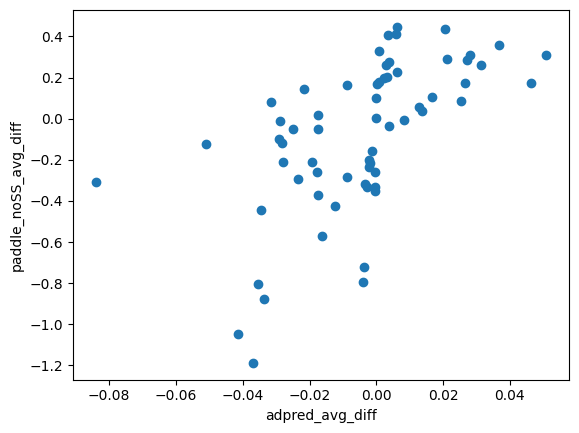

In [50]:
plt.scatter(x = "adpred_avg_diff", y = "paddle_noSS_avg_diff", data = exp_genes_pred_change)
plt.xlabel("adpred_avg_diff")
plt.ylabel("paddle_noSS_avg_diff");

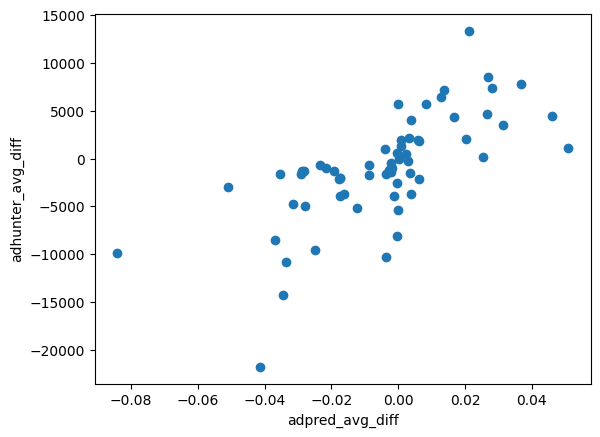

In [51]:
plt.scatter(x = "adpred_avg_diff", y = "adhunter_avg_diff", data = exp_genes_pred_change)
plt.xlabel("adpred_avg_diff")
plt.ylabel("adhunter_avg_diff");

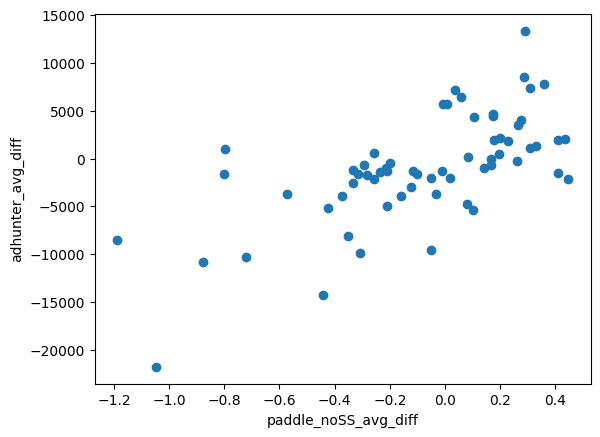

In [52]:
plt.scatter(x = "paddle_noSS_avg_diff", y = "adhunter_avg_diff", data = exp_genes_pred_change)
plt.xlabel("paddle_noSS_avg_diff")
plt.ylabel("adhunter_avg_diff");

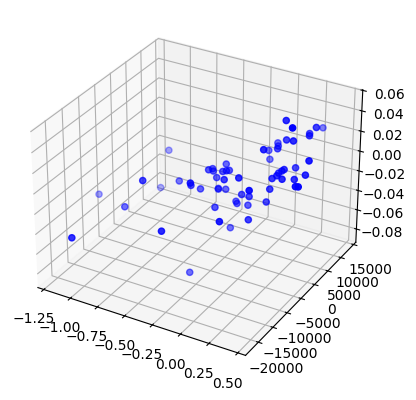

In [53]:
ax = plt.axes(projection ="3d")
ax.scatter3D(exp_genes_pred_change["paddle_noSS_avg_diff"], 
             exp_genes_pred_change["adhunter_avg_diff"], 
             exp_genes_pred_change["adpred_avg_diff"], color = "blue");


In [54]:
exp_genes_pred_change["num_outliers"].value_counts()

num_outliers
1    35
2    14
3    14
Name: count, dtype: int64

In [55]:
exp_genes_pred_change["AD"].value_counts()

AD
CAMTA2_O94983_AD_472-581     17
NCOA1_Q15788_AD_840-1011     16
ERG_P11308_AD_118-261        12
PAX5_Q02548_AD_304-358        7
NR4A2_P43354_AD_1-91          5
OTX1_P32242_AD_172-354        2
NCOA1_Q15788_AD_1241-1385     1
CAMTA2_O94983_AD_285-468      1
PAX6_P26367_AD_271-422        1
MEIS2_O14770_AD_340-477       1
Name: count, dtype: int64